# Transfocación de Datos

## Instalacion de librerias

In [1]:
!pip install pandas matplotlib seaborn plotly

## Importación de librerias

In [2]:
import pandas as pd # pd alias de variable de pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from extracion import Extracion as extra
import os

## Nota colab

Solo aplica si se va ejecutar desde colab

In [3]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [4]:
#%cd '/content/drive/My Drive/Colab Notebooks/'
#!ls

## Extracción

### Rutas de insumos

In [5]:
ruta_actual = os.getcwd()
print(ruta_actual)
extracion = extra()
path_ds_world_population = os.path.join(ruta_actual,'data/transformacion/data_population_world.csv').replace("\\","/")
path_metadata = os.path.join(ruta_actual,'data/transformacion/metadata_countries.csv').replace("\\","/")
path_codes = os.path.join(ruta_actual,'data/transformacion/country_list.csv').replace("\\","/")
path_years_schooling = os.path.join(ruta_actual,'data/transformacion/mean-years-of-schooling-long-run.csv').replace("\\","/")
path_countries_gdp = os.path.join(ruta_actual,'data/transformacion/countries_gdp_hist.csv').replace("\\","/")
path_organizations_gdp = os.path.join(ruta_actual,'data/transformacion/organizations_gdp_hist.csv').replace("\\","/")

C:\src\procesamientodeetl\dev\2024_04-main\src\etl


In [6]:
path_metadata

'C:/src/procesamientodeetl/dev/2024_04-main/src/etl/data/transformacion/metadata_countries.csv'

### Inicializar Dataframe

In [7]:
df_population = extracion.extracion_csv(path_ds_world_population, separador=',')
df_metadata = extracion.extracion_csv(path_metadata, separador=',')
df_codes = extracion.extracion_csv(path_codes, separador=',')
df_avg_schooling = extracion.extracion_csv(path_years_schooling, separador=';')
df_countries_gdp = extracion.extracion_csv(path_countries_gdp, separador=';')
df_organizations_gdp = extracion.extracion_csv(path_organizations_gdp, separador=',')

### previsualizar información

In [8]:
print(df_population.head(2))
print(df_metadata.head(2))
print(df_codes.head(2))
print(df_avg_schooling.head(2))
print(df_countries_gdp.head(2))
print(df_organizations_gdp.head(2))

  Country Name Country Code    Indicator Name Indicator Code         1960  \
0        Aruba          ABW  Población, total    SP.POP.TOTL      54608.0   
1          NaN          AFE  Población, total    SP.POP.TOTL  130692579.0   

          1961         1962         1963         1964         1965  ...  \
0      55811.0      56682.0      57475.0      58178.0      58782.0  ...   
1  134169237.0  137835590.0  141630546.0  145605995.0  149742351.0  ...   

          2013         2014         2015         2016         2017  \
0     102880.0     103594.0     104257.0     104874.0     105439.0   
1  567891875.0  583650827.0  600008150.0  616377331.0  632746296.0   

          2018         2019         2020         2021  Unnamed: 66  
0     105962.0     106442.0     106585.0     106537.0          NaN  
1  649756874.0  667242712.0  685112705.0  702976832.0          NaN  

[2 rows x 67 columns]
  Country Name Country Code Region  Income_Group  Unnamed: 4
0        Aruba          ABW    NaN  Ingr

## Información

In [9]:
df_avg_schooling.value_counts()

Entity           Code  Year  avg_years_of_schooling
Afghanistan      AFG   1870  0.01                      1
Niger            NER   2011  1.50                      1
North Macedonia  MKD   2006  8.40                      1
                       2005  8.20                      1
                       2004  7.80                      1
                                                      ..
Germany          DEU   1990  8.77                      1
                       1985  7.55                      1
                       1980  7.63                      1
                       1975  7.58                      1
Zimbabwe         ZWE   2017  8.20                      1
Name: count, Length: 7763, dtype: int64

In [10]:
len(df_avg_schooling)

7763

In [11]:
df_avg_schooling.describe()

,Year,avg_years_of_schooling
count,7763.000000,7763.000000
mean,1976.594487,5.479349
std,41.961371,3.849849
min,1870.000000,0.000000
25%,1955.000000,2.090000
50%,1996.000000,5.200000
75%,2007.000000,8.700000
max,2017.000000,14.100000


## NaN

In [12]:
df_population.isna().sum()

Country Name        2
Country Code        0
Indicator Name      0
Indicator Code      0
1960                2
                 ... 
2018                1
2019                1
2020                1
2021                1
Unnamed: 66       266
Length: 67, dtype: int64

In [13]:
df_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Población, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,NaN
1,NaN,AFE,"Población, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,NaN
2,Afganistán,AFG,"Población, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,NaN
3,NaN,AFW,"Población, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,NaN
4,Angola,AGO,"Población, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,NaN


In [14]:
# cambiar la tabla de formato a formato ancho
df_population1 = pd.melt(df_population, id_vars=['Country Name', 'Country Code', 'Indicator Code'],
                         value_vars=df_population.iloc[:,4:-1].columns,var_name='year',
                         value_name=('total'))

In [15]:
df_population1.isna().sum()

Country Name      124
Country Code        0
Indicator Code      0
year                0
total              92
dtype: int64

In [16]:
df_population1.head()

,Country Name,Country Code,Indicator Code,year,total
0,Aruba,ABW,SP.POP.TOTL,1960,54608.0
1,NaN,AFE,SP.POP.TOTL,1960,130692579.0
2,Afganistán,AFG,SP.POP.TOTL,1960,8622466.0
3,NaN,AFW,SP.POP.TOTL,1960,97256290.0
4,Angola,AGO,SP.POP.TOTL,1960,5357195.0


In [17]:
df_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Población, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,NaN
1,NaN,AFE,"Población, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,NaN
2,Afganistán,AFG,"Población, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,NaN
3,NaN,AFW,"Población, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,NaN
4,Angola,AGO,"Población, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,NaN


In [18]:
df_population1.columns

Index(['Country Name', 'Country Code', 'Indicator Code', 'year', 'total'], dtype='object')

In [19]:
df_population1.columns = ['country_name', 'country_code', 'indicator_code', 
                          'year', 'population']
df_population1.head(2)

,country_name,country_code,indicator_code,year,population
0,Aruba,ABW,SP.POP.TOTL,1960,54608.0
1,NaN,AFE,SP.POP.TOTL,1960,130692579.0


In [20]:
df_population1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    16368 non-null  object 
 1   country_code    16492 non-null  object 
 2   indicator_code  16492 non-null  object 
 3   year            16492 non-null  object 
 4   population      16400 non-null  float64
dtypes: float64(1), object(4)
memory usage: 644.3+ KB


In [21]:
df_population1.isna().sum()

country_name      124
country_code        0
indicator_code      0
year                0
population         92
dtype: int64

In [22]:
# df_population1['population'] = 0
df_population1 = df_population1.dropna(subset=['population'])

In [23]:
df_population1.isna().sum()

country_name      124
country_code        0
indicator_code      0
year                0
population          0
dtype: int64

In [24]:
df_population1 = df_population1[['country_name', 'country_code', 'indicator_code', 
                                 'year', 'population']]

In [25]:
## Titulo

In [26]:
df_population1.head(2)

,country_name,country_code,indicator_code,year,population
0,Aruba,ABW,SP.POP.TOTL,1960,54608.0
1,NaN,AFE,SP.POP.TOTL,1960,130692579.0


## Enriquesimiento

In [27]:
df_metadata.head(2)

,Country Name,Country Code,Region,Income_Group,Unnamed: 4
0,Aruba,ABW,NaN,Ingreso alto,NaN
1,NaN,AFE,NaN,Agregados,NaN


In [28]:
df_metadata.columns = ['country_name', 'country_code', 'region','income_group','n']
df_metadata['region'] = df_metadata['region'].fillna('Sin region')

In [29]:
df_world_population = df_population1.merge(df_metadata,left_on = 'country_code',
                                          right_on = 'country_code', how='inner')

In [30]:
df_world_population.head(2)

,country_name_x,country_code,indicator_code,year,population,country_name_y,region,income_group,n
0,Aruba,ABW,SP.POP.TOTL,1960,54608.0,Aruba,Sin region,Ingreso alto,NaN
1,NaN,AFE,SP.POP.TOTL,1960,130692579.0,NaN,Sin region,Agregados,NaN


In [31]:
df_world_population = df_world_population[['country_name_x', 'country_code', 'region', 'income_group', 'year' ,'population']]

In [32]:
df_world_population.head(1)

,country_name_x,country_code,region,income_group,year,population
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0


## AGREGAR Y ORDENAR COLUMNAS

In [33]:
df_world_population = df_world_population.sort_values(['country_code','year'], ascending=True) #ordenado ascendente por país y año

In [34]:
df_world_population.head(2)

,country_name_x,country_code,region,income_group,year,population
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0
264,Aruba,ABW,Sin region,Ingreso alto,1961,55811.0


### CALCULAR PORCENTAJE DE VARIACIÓN DE PAIS Y AÑO ACORDE A LA POBLACIÓN

In [35]:
df_world_population['rate_population'] = df_world_population.groupby(['country_name_x'],group_keys=False)['population'].pct_change()*100

In [36]:
df_world_population.head(10)

,country_name_x,country_code,region,income_group,year,population,rate_population
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0,NaN
264,Aruba,ABW,Sin region,Ingreso alto,1961,55811.0,2.202974
528,Aruba,ABW,Sin region,Ingreso alto,1962,56682.0,1.560624
792,Aruba,ABW,Sin region,Ingreso alto,1963,57475.0,1.399033
1056,Aruba,ABW,Sin region,Ingreso alto,1964,58178.0,1.223140
1320,Aruba,ABW,Sin region,Ingreso alto,1965,58782.0,1.038193
1584,Aruba,ABW,Sin region,Ingreso alto,1966,59291.0,0.865911
1848,Aruba,ABW,Sin region,Ingreso alto,1967,59522.0,0.389604
2112,Aruba,ABW,Sin region,Ingreso alto,1968,59471.0,-0.085683
2376,Aruba,ABW,Sin region,Ingreso alto,1969,59330.0,-0.237090


## Dividir una columna para sacar esa población y la asignamos a la columna nueva population_millon

In [37]:
df_world_population['population_millon'] = df_world_population['population']/1000000

In [38]:
df_world_population.head(10)

,country_name_x,country_code,region,income_group,year,population,rate_population,population_millon
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0,NaN,0.054608
264,Aruba,ABW,Sin region,Ingreso alto,1961,55811.0,2.202974,0.055811
528,Aruba,ABW,Sin region,Ingreso alto,1962,56682.0,1.560624,0.056682
792,Aruba,ABW,Sin region,Ingreso alto,1963,57475.0,1.399033,0.057475
1056,Aruba,ABW,Sin region,Ingreso alto,1964,58178.0,1.223140,0.058178
1320,Aruba,ABW,Sin region,Ingreso alto,1965,58782.0,1.038193,0.058782
1584,Aruba,ABW,Sin region,Ingreso alto,1966,59291.0,0.865911,0.059291
1848,Aruba,ABW,Sin region,Ingreso alto,1967,59522.0,0.389604,0.059522
2112,Aruba,ABW,Sin region,Ingreso alto,1968,59471.0,-0.085683,0.059471
2376,Aruba,ABW,Sin region,Ingreso alto,1969,59330.0,-0.237090,0.059330


In [39]:
df_world_population['population_millon'] = df_world_population['population_millon'].round(1)

In [40]:
df_world_population.head(10)

,country_name_x,country_code,region,income_group,year,population,rate_population,population_millon
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0,NaN,0.1
264,Aruba,ABW,Sin region,Ingreso alto,1961,55811.0,2.202974,0.1
528,Aruba,ABW,Sin region,Ingreso alto,1962,56682.0,1.560624,0.1
792,Aruba,ABW,Sin region,Ingreso alto,1963,57475.0,1.399033,0.1
1056,Aruba,ABW,Sin region,Ingreso alto,1964,58178.0,1.223140,0.1
1320,Aruba,ABW,Sin region,Ingreso alto,1965,58782.0,1.038193,0.1
1584,Aruba,ABW,Sin region,Ingreso alto,1966,59291.0,0.865911,0.1
1848,Aruba,ABW,Sin region,Ingreso alto,1967,59522.0,0.389604,0.1
2112,Aruba,ABW,Sin region,Ingreso alto,1968,59471.0,-0.085683,0.1
2376,Aruba,ABW,Sin region,Ingreso alto,1969,59330.0,-0.237090,0.1


In [41]:
df_world_population['rate_population_millon'] = df_world_population['rate_population'].round(1)

### Exportar a Excel

In [42]:
df_world_population.to_excel('población_mundial.xlsx')

### Agregar nuevo Dataframe con la subregion

In [43]:
df_world_country_pop = df_world_population.merge(df_codes,left_on = 'country_code',
                                          right_on = 'alpha-3', how='inner')

In [44]:
df_world_country_pop.head(2)

,country_name_x,country_code,region_x,income_group,year,population,rate_population,population_millon,rate_population_millon,name,alpha-2,alpha-3,country-code,iso_3166-2,region_y,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0,NaN,0.1,NaN,Aruba,AW,ABW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
1,Aruba,ABW,Sin region,Ingreso alto,1961,55811.0,2.202974,0.1,2.2,Aruba,AW,ABW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0


In [45]:
df_world_country_pop = df_world_country_pop[df_world_country_pop['country_code'].isin(df_world_country_pop['country_code'])]

In [46]:
df_world_country_pop.head(2)

,country_name_x,country_code,region_x,income_group,year,population,rate_population,population_millon,rate_population_millon,name,alpha-2,alpha-3,country-code,iso_3166-2,region_y,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0,NaN,0.1,NaN,Aruba,AW,ABW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0
1,Aruba,ABW,Sin region,Ingreso alto,1961,55811.0,2.202974,0.1,2.2,Aruba,AW,ABW,533,ISO 3166-2:AW,Americas,Latin America and the Caribbean,Caribbean,19.0,419.0,29.0


### Filtrado del Dataframe

In [48]:
df_world_country_pop = df_world_country_pop[['country_name_x','country_code','region_y', 'sub-region', 'income_group','year','population','rate_population','population_millon','rate_population_millon']]

In [49]:
df_world_country_pop.head(2)

,country_name_x,country_code,region_y,sub-region,income_group,year,population,rate_population,population_millon,rate_population_millon
0,Aruba,ABW,Americas,Latin America and the Caribbean,Ingreso alto,1960,54608.0,NaN,0.1,NaN
1,Aruba,ABW,Americas,Latin America and the Caribbean,Ingreso alto,1961,55811.0,2.202974,0.1,2.2


In [50]:
df_world_country_pop.columns=['country_code','country_name','region_name','sub_region_name','income_group','year','population','pop_millon','rate_pop','rate_pop_millon']
df_world_population.columns=['country_name','country_code','region','income_group','year','population','rate_pop','pop_millon','rate_pop_millon']

## Exploración de Datos

In [51]:
df_world_population.head(2)

,country_name,country_code,region,income_group,year,population,rate_pop,pop_millon,rate_pop_millon
0,Aruba,ABW,Sin region,Ingreso alto,1960,54608.0,NaN,0.1,NaN
264,Aruba,ABW,Sin region,Ingreso alto,1961,55811.0,2.202974,0.1,2.2


In [53]:
# df_world_population.to_excel("mundial_población.xlsx")

#### Filtrar por columna y sacar solo un valor en este caso de la columna country_name lo que son Mundo

In [54]:
df_world = df_world_population[df_world_population['country_name'] == 'Mundo']
print(df_world.shape,"\n",df_world.head(2))

(62, 9) 
     country_name country_code      region income_group  year    population  \
257        Mundo          WLD  Sin region    Agregados  1960  3.031565e+09   
521        Mundo          WLD  Sin region    Agregados  1961  3.072511e+09   

     rate_pop  pop_millon  rate_pop_millon  
257       NaN      3031.6              NaN  
521  1.350646      3072.5              1.4  


### Evolución de la población mundial en todos los años

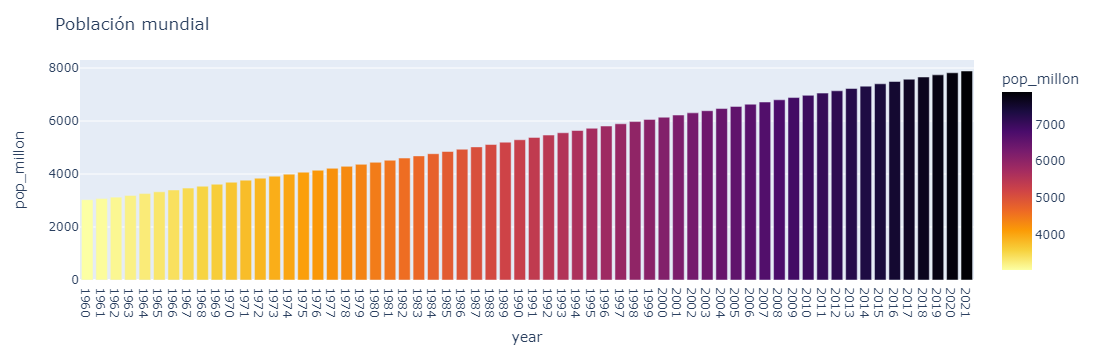

In [58]:
fig = px.bar(df_world, x='year',y='pop_millon',color='pop_millon',color_continuous_scale='inferno_r')
fig.update_layout(title='Población mundial')
fig.show()

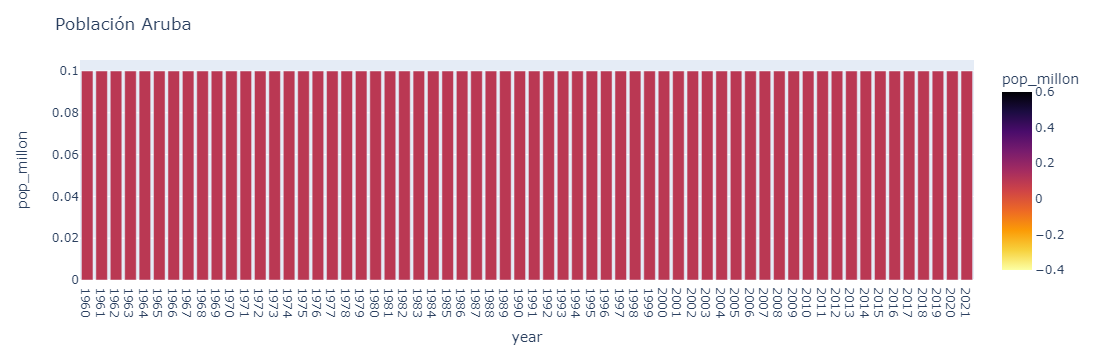

In [57]:
fig = px.bar(df_world_population[df_world_population['country_name']=='Aruba'],x='year',y='pop_millon',color ='pop_millon',color_continuous_scale='inferno_r')
fig.update_layout(title='Población Aruba')
fig.show()

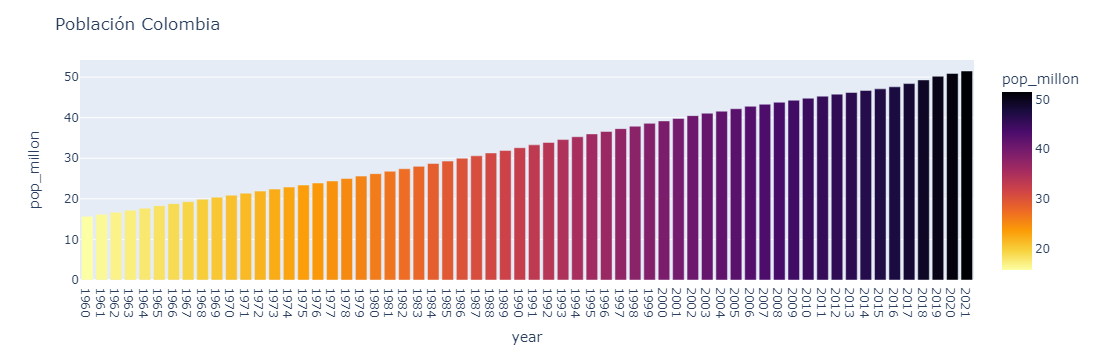

In [59]:
fig = px.bar(df_world_population[df_world_population['country_name']=='Colombia'],x='year',y='pop_millon',color ='pop_millon',color_continuous_scale='inferno_r')
fig.update_layout(title='Población Colombia')
fig.show()

### Agrupación por ingresos de la población, con el fin de buscar comportamientos, saber si los ingresos son altos, bajos

In [63]:
df_world_population[df_world_population['income_group']!='No clasificado'].groupby(['income_group','year'])[['population','rate_pop']].head(2)

,population,rate_pop
0,54608.0,NaN
264,55811.0,2.202974
528,56682.0,1.560624
792,57475.0,1.399033
1056,58178.0,1.223140
...,...,...
15093,11596779.0,2.990155
15358,11940683.0,2.965513
15623,12290444.0,2.929154
15888,12643123.0,2.869538


In [64]:
df_world_population[df_world_population['income_group']!='No clasificado'].groupby(['income_group','year'])[['population','rate_pop']].sum().head(2)

population   rate_pop
income_group year                         
Agregados    1960  2.792487e+10   0.000000
             1961  2.830885e+10  83.094982

In [65]:
df_world_population[df_world_population['income_group']!='No clasificado'].groupby(['income_group','year'])[['population','rate_pop']].sum().reset_index().head(2)

,income_group,year,population,rate_pop
0,Agregados,1960,2.792487e+10,0.000000
1,Agregados,1961,2.830885e+10,83.094982


In [ ]:
df_world_population[df_world_population['income_group']!='No clasificado'].groupby(['income_group','year'])[['population','rate_pop']].sum().reset_index().head(2)

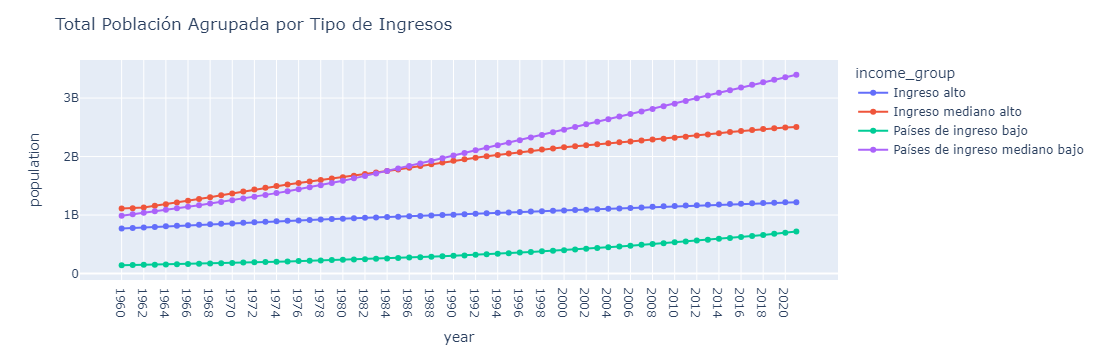

In [78]:
filtered_df = df_world_population[~df_world_population['income_group'].isin(['No clasificado', 'Agregados'])]
fig = px.line(filtered_df.groupby(['income_group','year'])[['population','rate_pop']].sum().reset_index(),x='year',y='population',color ='income_group', markers=True)
fig.update_layout(title='Total Población Agrupada por Tipo de Ingresos')
fig.show()

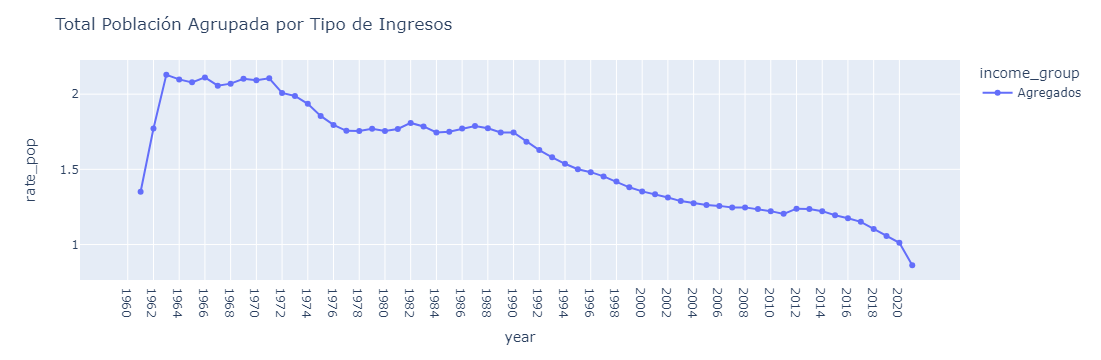

In [77]:
fig = px.line(df_world,x='year',y='rate_pop',color ='income_group', markers=True)
fig.update_layout(title='Total Población Agrupada por Tipo de Ingresos')
fig.show()

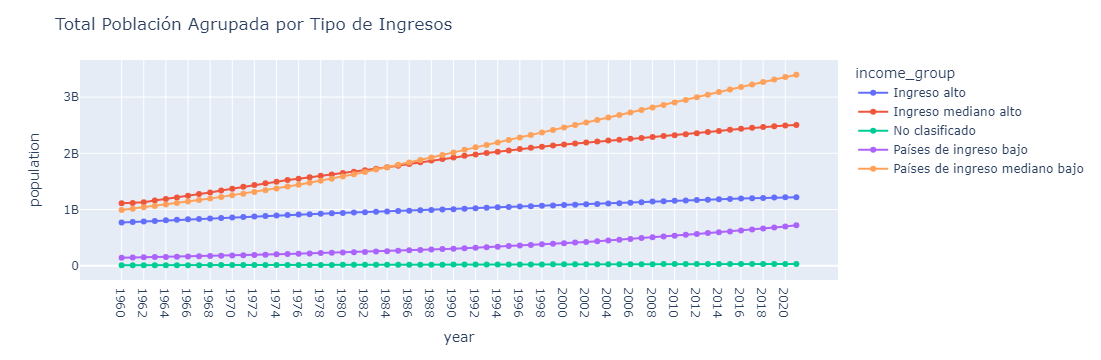

In [71]:
fig = px.line(df_world_population[df_world_population['income_group']!='Agregados'].groupby(['income_group','year'])[['population','rate_pop']].sum().reset_index(),x='year',y='population',color ='income_group',markers=True)
fig.update_layout(title='Total Población Agrupada por Tipo de Ingresos')
fig.show()

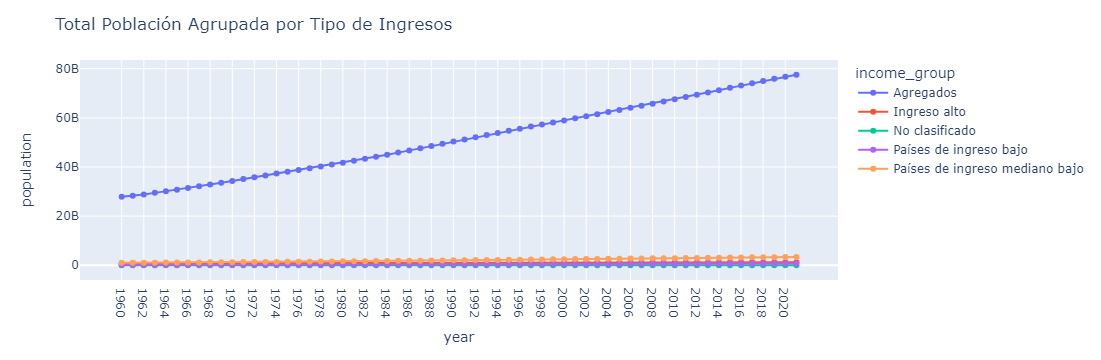

In [72]:
fig = px.line(df_world_population[df_world_population['income_group']!='Ingreso mediano alto'].groupby(['income_group','year'])[['population','rate_pop']].sum().reset_index(),x='year',y='population',color ='income_group',markers=True)
fig.update_layout(title='Total Población Agrupada por Tipo de Ingresos')
fig.show()